In [1]:
import sqlite3
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

import matplotlib.pyplot as plt
#plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
#plt.show()

3.6.3
module://matplotlib_inline.backend_inline


Задание по sql:
Нужно проанализировать информацию по продуктам. Представим что мы покупатели и наша цель выбрать подходящий момент для покупки, или мы продавец и нам надо понимать когда стоит повысить цену а когда ее снижать. Для этого нужно:

+Понять среднюю цену на продукт в конкретном магазине, 
+посмотреть как цена и остатки  меняются в зависимости от даты обновления.

+Для получения информации по цене надо построить таблицу содержащую следующие столбцы: название товара, магазин, дата, цена.

Чтобы понять как быстро раскупают товары можно построить таблицу обратив внимание на столбец с остатками.

Далее может добавить несколько покупателей, к ним добавить их траты. И проанализировать какой самый частый товар покупают, сколько в среднем каждый пользователь тратит на покупки, среднюю цену покупки. Вывести в одну таблицу сколько пользователь потратил в 1-ом квартале 22,  2-ом квартале 22,  3-ом квартале 22,  4-ом квартале 22.

In [2]:
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [11]:
cursor.execute("""
    SELECT sql FROM sqlite_master
    WHERE tbl_name = 'products_history' AND type = 'table'
    """)

print(cursor.fetchall())

[('CREATE TABLE "products_history" ("id" integer NOT NULL PRIMARY KEY AUTOINCREMENT, "datetime_create" datetime NULL, "description" varchar(10000) NULL, "params" varchar(10000) NULL, "price" decimal NULL, "task" varchar(200) NULL, "title" varchar(200) NULL, "price_sale" decimal NULL, "quantity" integer NULL, "brand" varchar(1000) NULL, "brand_url" varchar(1000) NULL, "canonical_url" varchar(1000) NULL, "category" varchar(1000) NULL, "category_url" varchar(1000) NULL, "count_comments" integer NULL, "count_how_much_buy" integer NULL, "count_likes" integer NULL, "count_photo" integer NULL, "count_questions" integer NULL, "count_stars_1" integer NULL, "count_stars_2" integer NULL, "count_stars_3" integer NULL, "count_stars_4" integer NULL, "count_stars_5" integer NULL, "count_stars_all" integer NULL, "day_to_delivery" integer NULL, "img_url" varchar(1000) NULL, "score" decimal NULL, "seller" varchar(1000) NULL, "seller_url" varchar(1000) NULL, "sku" varchar(1000) NULL, "source_url" varchar

In [13]:
# Понять среднюю цену на продукт в конкретном магазине
# Как называется колонка с названием магазина? - выбрала "seller"
cursor.execute("""
    SELECT title, seller, ROUND(AVG(price),2)
    FROM products_history 
    GROUP BY title
    
""")

print(cursor.fetchall())

[(None, None, None), ('', '', None), ('"BOMBBAR" Печенье неглазированное "Вишня" 40 гр.', None, 79.99), ('"КЕШЬЮ". Шоколад молочный c кусочками соленого кешью. 100г', None, 159.99), ('"Липецкая-Лайт" напиток безалк.на основе минеральной природной воды со вкусом лимона и лайма среднегазированный пастеризованный 1,5л', None, 59.99), ('"Липецкая-Лайт" напиток безалкогольный на основе минеральной природной воды со вкусом вишни среднегазированный пастеризованный 1,5л', None, 59.99), ('"ЦЕЛЬНЫЙ МИНДАЛЬ". Шоколад темный с цельным миндалем 100гр RITTER SPORT', None, 146.99), ('#Girlboss. Как я создала миллионный бизнес, не имея денег, офиса и высшего образования. София Аморузо', None, 0.0), ('#Топ-рецепты say7, Скрипкина А.Ю.', None, 0.0), ('10 разноцветных паучков', None, 0.0)]


('Паста Nutella Шоколадная 350г', 455, 1, '2022-12-15')
455
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-14')
499
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-13')
499
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-12')
499
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-11')
499
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-10')
499
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-09')
499
('Паста Nutella Шоколадная 350г', 359, 1, '2022-12-08')
359
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-07')
499
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-07')
499
('Паста Nutella Шоколадная 350г', 499, 1, '2022-12-06')
499


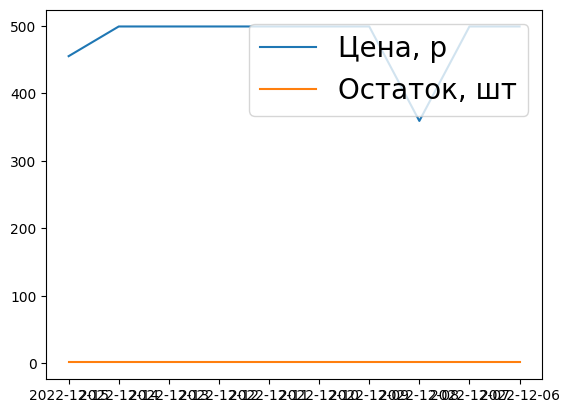

In [18]:
# посмотреть как цена и остатки  меняются в зависимости от даты обновления
cursor.execute("""
    SELECT 
        title, 
        price, 
        quantity, 
        DATE(datetime_create)
    FROM products_history
    WHERE title = "Паста Nutella Шоколадная 350г"
    ORDER BY title, datetime_create DESC 
""")

#print(cursor.fetchall())

# сначала узнаем как менялась цена
x = []
x2 = []
y = []
y2 = []
for i in cursor.fetchall():
    print(i)
    print(i[1])
    y.append(i[1])
    y2.append(i[2])
    x.append(i[3])
    x2.append(i[3])
    
plt.figure()
plt.plot(x, y, label=r'Цена, р')
plt.plot(x2, y2, label=r'Остаток, шт')
plt.legend(fontsize=20, loc=1)
plt.show()


In [5]:
# Для получения информации по цене надо построить таблицу содержащую следующие столбцы: название товара, магазин, дата, цена
cursor.execute("""
    SELECT 
        title,
        seller,
        DATE(datetime_create),
        price 
    FROM products_history
    LIMIT 20
""")

print(cursor.fetchall())

[('Первый тест', '', '2022-11-20', 150233.02), ('test 2', '', '2022-11-20', 2), ('', '', '2022-11-27', None), (None, None, '2022-11-27', None), (None, None, '2022-11-27', None), (None, None, '2022-11-27', None), (None, None, '2022-11-27', None), (None, None, '2022-11-27', None), ('title_example', 'seller_example', '2022-11-27', -8072), ('Блин вратаря DR X6 GOALIE BLOKER', None, '2022-11-27', None), ('Блин вратаря DR X6 GOALIE BLOKER', None, '2022-11-27', None), ('Блин вратаря DR X6 GOALIE BLOKER', None, '2022-11-27', 6864), ('Блин вратаря DR X6 GOALIE BLOKER', None, '2022-11-27', 6864), ('Блин вратаря DR X6 GOALIE BLOKER', None, '2022-11-27', 6864), ('Горнолыжные ботинки Dalbello CHAKRA ELEVATE 115 T.I. ID', None, '2022-11-27', 66142), ('Горнолыжные ботинки Dalbello LUPO AX 120', None, '2022-11-27', 68640), ('Горнолыжные ботинки Dalbello QUANTUM FREE 110', None, '2022-11-27', 69887), ('Горнолыжные ботинки Dalbello KRYPTON 130 T.I. ID', None, '2022-11-27', 74880), ('Горнолыжные ботинки 

In [22]:
# Чтобы понять как быстро раскупают товары можно построить таблицу обратив внимание на столбец с остатками.
cursor.execute("""
    SELECT 
        title,
        seller,
        quantity,
        DATE(datetime_create)
    FROM products_history
    WHERE title = "Хлеб «Хлебный Дом» Стройный рецепт, 350 г"
    LIMIT 100
""")

print(cursor.fetchall())

x = []
y = []

fot item in cursor.fetchall():
    x.append(item[3])
    y.append(item[2])

[('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 6, '2022-12-20'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 3, '2022-12-22'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 3, '2022-12-22'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 9, '2022-12-23'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 9, '2022-12-23'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 1, '2022-12-25'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 1, '2022-12-29'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 4, '2022-12-30'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 13, '2022-12-31'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 9, '2023-01-01'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 9, '2023-01-02'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 2, '2023-01-04'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 20, '2023-01-06'), ('Хлеб «Хлебный Дом» Стройный рецепт, 350 г', None, 8, '2023-01-07'), ('Хлеб «Хлебный Д

In [ ]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS mvandreeva_buyers(
        id INT NOT NULL PRIMARY KEY AUTO_INCREMENT,
        product_name VARCHAR(255),
        shop_name VARCHAR(255),
        date DATETIME,
        price INT,
        available_amount INT
""")

print(cursor.fetchall())